### Importing the Libraries

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("darkgrid")

### Importing the CSV Absenteesim Data

In [40]:
raw_csv_data = pd.read_csv("Absenteeism_data.csv")

In [41]:
raw_csv_data

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,28,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,18,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,25,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


In [ ]:
sns.pairplot(raw_csv_data)

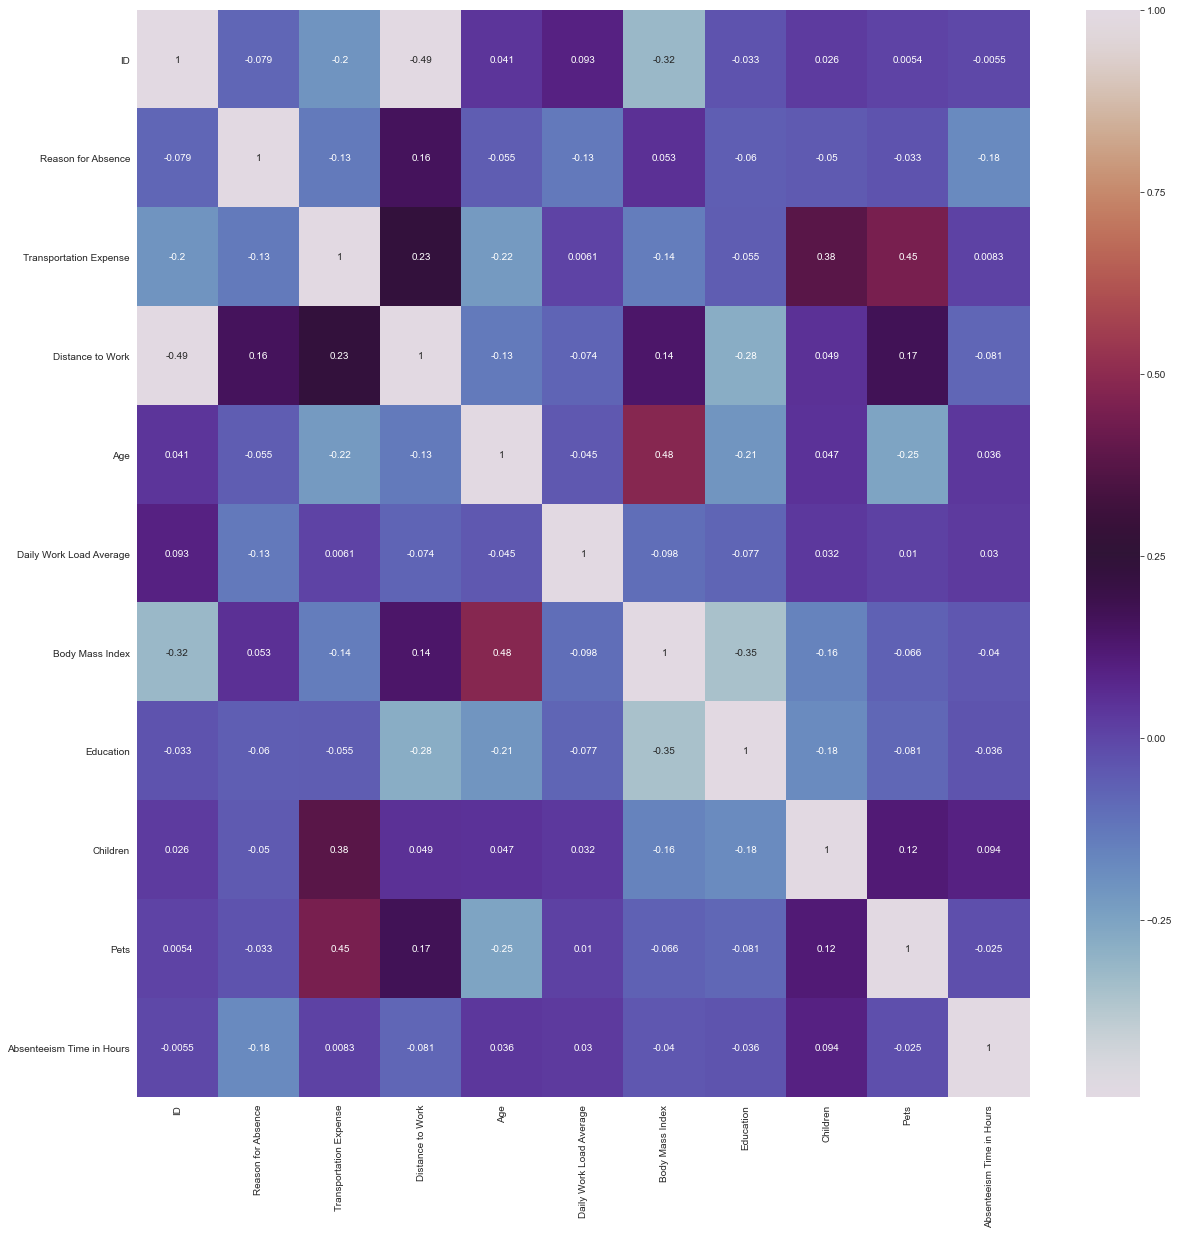

In [73]:
fig, ax = plt.subplots(figsize=(20, 20)) 
sns.heatmap(raw_csv_data.corr(), annot = True, ax = ax, cmap="twilight")

### Creating the copy of your data

In [ ]:
df = raw_csv_data.copy()

### Setting the display settings

In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### Info of the CSV Data

In [ ]:
df.info()

#### Quick Note : In our case, the 'Absenteeism in Hours' is the dependent variable and all others are independent variable.

### Drop the ID Column

In [ ]:
df = df.drop(['ID'] , axis = 1)

### What is the 'Reason of Absence' ?

In [42]:
df['Reason for Absence'].unique()

NameError: name 'df' is not defined

In [ ]:
len(df['Reason for Absence'].unique())

#### The number 20 is missing from the list and is required to make a suitable command.

#### Dummy Variables : an explanatory  binary variable that equals 1 if the certain categorical effect is present and that equals 0 if that is same effect is absent.

### Creating the dummies of the variable

In [ ]:
reasons_columns = pd.get_dummies(df['Reason for Absence'])
reasons_columns

In [ ]:
reasons_columns['check'] = reasons_columns.sum(axis = 1)
reasons_columns

#### This shows that the 'Reasons for Absence' column is flawless and does not contain any null value.

In [ ]:
reasons_columns = reasons_columns.drop(['check'],axis = 1)
reasons_columns

#### We also needs to be aware about the multi collinearity issues which can cause the issue of the ambiguity.

#### Now we can drop the index 0 of the new dataframe we have created which is reasons_columns

In [ ]:
reasons_columns = pd.get_dummies(df['Reason for Absence'] , drop_first=True)
reasons_columns

### Group and Classifying the Reason of Absence

In [ ]:
df.columns.values

In [ ]:
reasons_columns.columns.values

#### Note : If we add the reasons columns in the dataframe so these columns convey the same meaning as the 'Reasons for Absence' Column. In the statistics this is called as the Multicoleanirity

#### So now we can drop the Reason for Absence Columns.

In [ ]:
df = df.drop(['Reason for Absence'] , axis=1)

In [ ]:
df

#### And now we can group the column (classification done) because adding all the reason of absence does not make any sense and this would create 40 new variables which cant be processed.

#### Grouping these variables = Classification 

##### Reorganizing a certain type of variable into groups in a regression analysis.

### Groups

#### The group 1-14 : It is all related with all kinds of diseases.
#### The group 15-17 : It is all related with all kinds of pregancy or giving birth.
#### The group 18-21 : It is all related with all kinds of poisoning or signs of murder.
#### The group 22-28 : It is all related with all kinds of light diseases (dental issues , fever and to name a few).

### Creating the groups of Reason of Absence Columns.

In [ ]:
reason_type_1 = reasons_columns.loc[:,1:14].max(axis = 1)
reason_type_2 = reasons_columns.loc[:,15:17].max(axis = 1)
reason_type_3 = reasons_columns.loc[:,18:21].max(axis = 1)
reason_type_4 = reasons_columns.loc[:,22:].max(axis = 1)

In [ ]:
reason_type_1

### Concatenate Column Values

In [ ]:
df

In [ ]:
df = pd.concat([df , reason_type_1 , reason_type_2 , reason_type_3 , reason_type_4] , axis=1)
df

#### Concatenating the column names

In [ ]:
df.columns.values

In [ ]:
column_names = ['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']

In [ ]:
df.columns = column_names

In [ ]:
df

### Creating a checkpoint

In [ ]:
df_reason_mod = df.copy()

### Date Extraction

In [ ]:
type(df_reason_mod['Date'])

In [ ]:
df_reason_mod['Date'] = pd.to_datetime(df_reason_mod['Date'] , format='%d/%m/%Y')

In [ ]:
df_reason_mod['Date']

In [ ]:
df_reason_mod.info()

### Extract the Month Value

In [ ]:
df_reason_mod['Date'][0]

In [ ]:
df_reason_mod['Date'][0].month

In [ ]:
list_month = []
list_month

In [ ]:
for i in range(700):
    list_month.append(df_reason_mod['Date'][i].month)

In [ ]:
df_reason_mod['Month Value'] = list_month

In [ ]:
df_reason_mod.head(10)

In [ ]:
plt.figure(figsize=(10,5))
r= df_reason_mod.groupby('Month Value')
arr=r['Absenteeism Time in Hours'].count()
arr=np.array(arr)
arr=arr[1:]
arr1=r['Absenteeism Time in Hours'].mean()
arr1=np.array(arr1)
arr1=arr1[1:]
bars=plt.bar(x=np.arange(len(arr)),height=arr,color='maroon',label='Count')
bars1=plt.bar(x=np.arange(len(arr)),height=arr1,color='black',label='Mean')
plt.xlabel('Month')
plt.xticks(np.arange(len(arr)),['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
plt.title('Monthly Variations')
plt.legend()

### Extract the Day of the Week

In [ ]:
df_reason_mod['Date'][699].weekday()

In [ ]:
def date_to_weekday(date_value):
    return date_value.weekday()

In [ ]:
df_reason_mod['Day of the Week'] = df_reason_mod['Date'].apply(date_to_weekday)

In [ ]:
df_reason_mod.head(10)

In [ ]:
plt.figure(figsize=(7,7))
r= df_reason_mod.groupby('Day of the Week')
arr=r['Absenteeism Time in Hours'].count()
arr=np.array(arr)
print(arr)
arr1=r['Absenteeism Time in Hours'].mean()
arr1=np.array(arr1)
bars=plt.bar(x=np.arange(len(arr)),height=arr,color='maroon',label='Count')
bars1=plt.bar(x=np.arange(len(arr)),height=arr1,color='black',label='Mean')
plt.xlabel('Days of week')
plt.xticks(np.arange(len(arr)),['MON','TUE','WED','THUR','FRI','SAT','SUN'])
plt.title('Days of week variation')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Month Value',y='Absenteeism Time in Hours',data=df_reason_mod,hue='Day of the Week')

In [ ]:
df_reason_mod['Transportation Expense'].mean()
df2=df_reason_mod.assign(avg=df_reason_mod['Transportation Expense']/df_reason_mod['Distance to Work'])
plt.figure(figsize=(10,10))
sns.jointplot(x='avg',y='Absenteeism Time in Hours',data=df2,kind='reg',color='crimson')
plt.title('Expense/Distance ratio')
plt.xlabel('Ratio Expense/Dist')
plt.show()

In [ ]:
sns.jointplot(x='Transportation Expense',y='Month Value',data=df_reason_mod,kind='hex',color='maroon')

In [ ]:
r= df_reason_mod.groupby('Education')
r['Absenteeism Time in Hours'].count()
arr1=r['Absenteeism Time in Hours'].mean()
arr1=np.array(arr1)
bars=plt.bar(np.arange(len(arr1)),height=arr1,label='mean',color='Maroon')
plt.ylabel('Absent Time')
plt.title('Education Variation')
plt.xticks(np.arange(len(arr1)),['high school', 'graduate'],rotation=15)
plt.legend()
plt.show()

In [ ]:
bins=list([0,18.4,24.9,29.9,39.9])
df1=df_reason_mod.assign(bmi=pd.cut(df_reason_mod['Body Mass Index'], bins=bins))
print(df1['bmi'].value_counts())
plt.figure(figsize=(5,7))
r= df1.groupby('bmi')
arr=r['Absenteeism Time in Hours'].count()
arr1=r['Absenteeism Time in Hours'].mean()
bars=plt.bar(x=np.arange(len(arr)),height=arr,color='maroon',label='Count')
bars1=plt.bar(x=np.arange(len(arr)),height=arr1,color='black',label='Mean')
plt.ylabel('Values')
plt.xticks(np.arange(len(arr)),['Underweight','Healthy Weight','OverWeight','Obese'],rotation=30)
plt.title('BMI variation')
plt.legend(loc='upper left')
plt.show()

In [71]:
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import scale as s
from scipy.cluster.hierarchy import dendrogram, linkage

In [72]:
Z = sch.linkage(raw_csv_data,method='ward')  
den = sch.dendrogram(Z)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,     
    top=False,         
    labelbottom=False) 
plt.title('Hierarchical Clustering')

ValueError: could not convert string to float: '07/07/2015'

In [ ]:
df_reason_date_mod = df_reason_mod.copy()

### Analyzing the straight forward columns

#### Travel Expense = fuel + parking + meals + transportation + others
#### Transportation expense is calculated in the dollars
#### Daily Work Load Average = The average amount of work being done in minutes.

### Working on 'Education' , 'Children' , 'Pets'

#### Education : 1 - High School
#### Education : 2 - Graduate
#### Education : 3 - Postgraduate
#### Education : 4 - a master or a doctor degree 

In [ ]:
df_reason_date_mod['Education'].unique()

In [ ]:
df_reason_date_mod['Education'].value_counts()

In [ ]:
df_reason_date_mod['Education'] = df_reason_date_mod['Education'].map({1:0,2:1,3:1,4:1})

In [ ]:
df_reason_date_mod['Education'].unique()

In [ ]:
df_reason_date_mod['Education'].value_counts()

In [ ]:
df_preprocessed = df_reason_date_mod.copy()

In [ ]:
df_preprocessed.head()

In [ ]:
df_preprocessed.to_csv('Absenteeism_data_Preprocessed.csv' , index=False)

## Feature Scaling

In [12]:
continuous_vars = ['Distance to Work', 'Age', 'Daily Work Load Average', 'Transportation Expense',
       'Body Mass Index', 'Absenteeism time in hours']
continuous_vars

['Distance to Work',
 'Age',
 'Daily Work Load Average',
 'Transportation Expense',
 'Body Mass Index',
 'Absenteeism time in hours']

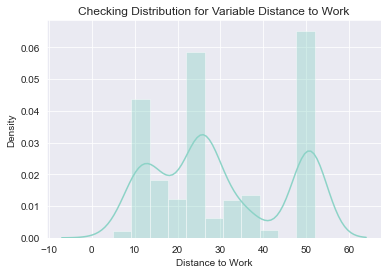

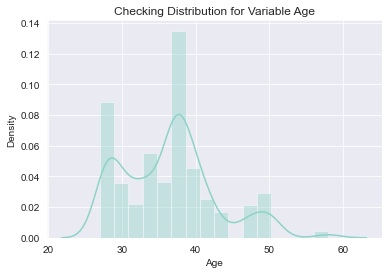

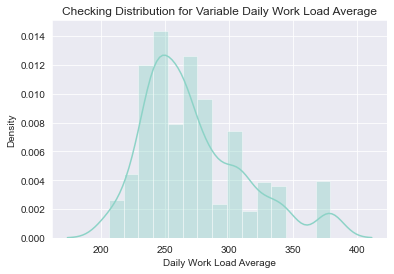

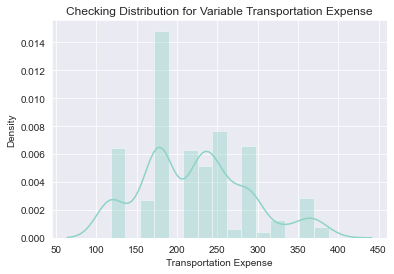

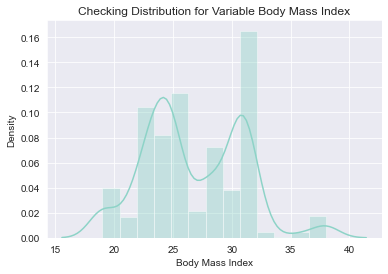

In [38]:
for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(raw_csv_data[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

In [14]:
missing_val = pd.DataFrame(raw_csv_data.isnull().sum())
missing_val

,0
ID,0
Reason for Absence,0
Date,0
Transportation Expense,0
Distance to Work,0
Age,0
Daily Work Load Average,0
Body Mass Index,0
Education,0
Children,0


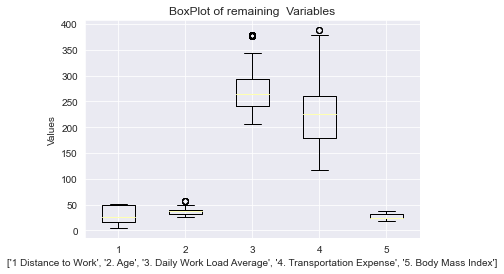

In [37]:
plt.boxplot([ raw_csv_data['Distance to Work'],  raw_csv_data['Age'], raw_csv_data['Daily Work Load Average'], raw_csv_data['Transportation Expense'], raw_csv_data['Body Mass Index']])
plt.xlabel(['1 Distance to Work', '2. Age', '3. Daily Work Load Average', '4. Transportation Expense', '5. Body Mass Index'])
plt.title("BoxPlot of remaining  Variables")
plt.ylabel('Values')
plt.show()

In [43]:
dfdata = pd.read_csv('Absenteeism_data_Preprocessed.csv')

In [44]:
dfdata.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week
0,2015-07-07,289,36,33,239.554,30,0,2,1,4,0,0,0,1,7,1
1,2015-07-14,118,13,50,239.554,31,0,1,0,0,0,0,0,0,7,1
2,2015-07-15,179,51,38,239.554,31,0,0,0,2,0,0,0,1,7,2
3,2015-07-16,279,5,39,239.554,24,0,2,0,4,1,0,0,0,7,3
4,2015-07-23,289,36,33,239.554,30,0,2,1,2,0,0,0,1,7,3


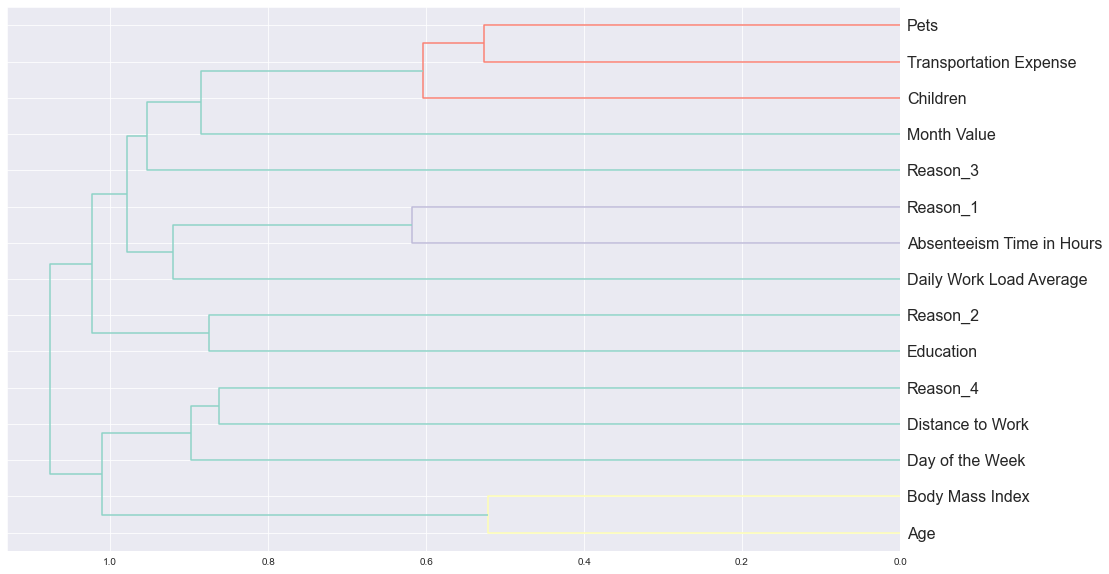

In [47]:
from scipy.cluster import hierarchy as hc
import scipy
df_features = dfdata[['Transportation Expense', 'Distance to Work', 'Age', 'Daily Work Load Average', 'Body Mass Index', 
        'Education', 'Children', 'Pets', 'Absenteeism Time in Hours', 'Reason_1',
        'Reason_2', 'Reason_3', 'Reason_4', 'Month Value', 'Day of the Week']]

corr = np.round(scipy.stats.spearmanr(df_features).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_features.columns, orientation='left', leaf_font_size = 16)
plt.show()

In [51]:
education_mapping = {
    1: 'High School',
    2: 'Graduate',
    3: 'Post Graduate',
    4: 'Master & Doctor'
}
education_list = {'High School', 'Graduate', 'Post Graduate', 'Master & Doctor'}
raw_csv_data['Education_detail'] = raw_csv_data['Education'].map(education_mapping)
#df['Education_detail'] = df['Education_detail'].astype('category')
category_education = pd.api.types.CategoricalDtype(categories=education_list, ordered=True)
raw_csv_data['Education_detail'] = raw_csv_data['Education_detail'].astype(category_education)

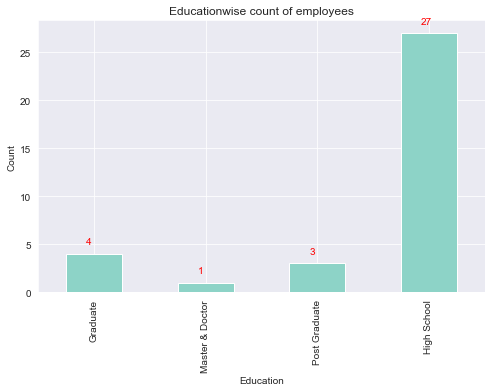

In [66]:
edu_count = raw_csv_data.groupby(['Education_detail']).agg({'ID': pd.Series.nunique})
ax = edu_count.plot(kind='bar', figsize=(8,5), legend=False)
for i, v in enumerate(edu_count.values):
    ax.text(i-.07, v + 1, str(v[0]), color='red')
ax.set_xlabel('Education')
ax.set_ylabel('Count')
ax.set_title('Educationwise count of employees')
plt.show()

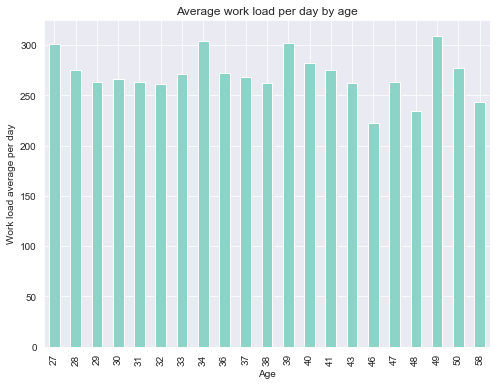

In [62]:
age_work_sum = raw_csv_data.groupby('Age', as_index=False)[['Daily Work Load Average']].mean()
ax = age_work_sum.plot(kind='bar', x='Age', figsize=(8,6), legend=False)
ax.set_ylabel('Work load average per day')
ax.set_title('Average work load per day by age')
plt.show()

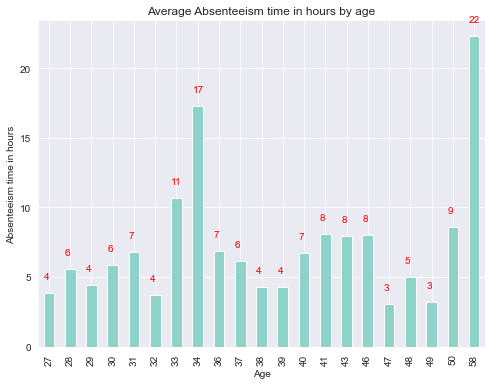

In [65]:
age_abs = raw_csv_data.groupby('Age')[['Absenteeism Time in Hours']].mean()
ax = age_abs.plot(kind='bar', figsize=(8,6), legend=False)
for i, v in enumerate(age_abs.values):
    ax.text(i-.25, v + 1, str(np.int(np.round(v))), color='red')
ax.set_ylabel('Absenteeism time in hours')
ax.set_title('Average Absenteeism time in hours by age')
plt.show()

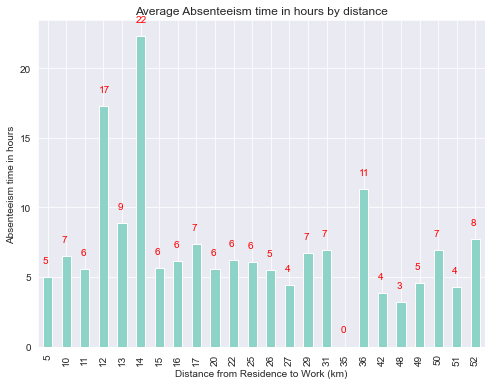

In [67]:
dis_abs = raw_csv_data.groupby('Distance to Work')[['Absenteeism Time in Hours']].mean()
ax = dis_abs.plot(kind='bar', figsize=(8,6), legend=False)
for i, v in enumerate(dis_abs.values):
    ax.text(i-.25, v + 1, str(np.int(np.round(v))), color='red')
ax.set_xlabel('Distance from Residence to Work (km)')
ax.set_ylabel('Absenteeism time in hours')
ax.set_title('Average Absenteeism time in hours by distance')
plt.show()

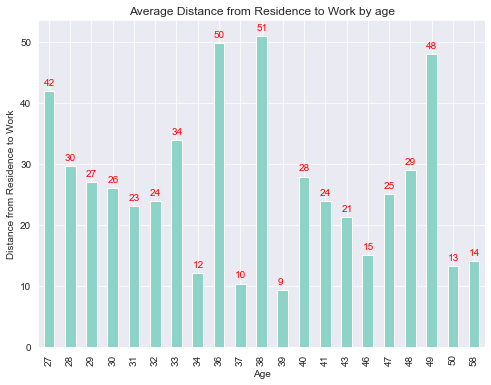

In [68]:
age_dis = raw_csv_data.groupby('Age')[['Distance to Work']].mean()
ax = age_dis.plot(kind='bar', figsize=(8,6), legend=False)
for i, v in enumerate(age_dis.values):
    ax.text(i-.25, v + 1, str(np.int(np.round(v))), color='red')
ax.set_ylabel('Distance from Residence to Work')
ax.set_title('Average Distance from Residence to Work by age')
plt.show()

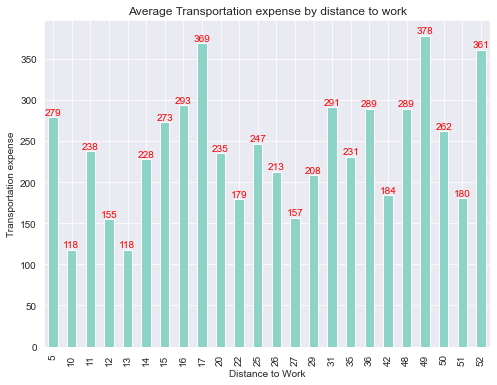

In [70]:
dis_exp = raw_csv_data.groupby('Distance to Work')[['Transportation Expense']].mean()
ax = dis_exp.plot(kind='bar', figsize=(8,6), legend=False)
for i, v in enumerate(dis_exp.values):
    ax.text(i-.45, v + 3, str(np.int(np.round(v))), color='red')
ax.set_ylabel('Transportation expense')
ax.set_title('Average Transportation expense by distance to work')
plt.show()

In [75]:
data_corr=raw_csv_data.loc[:,continuous_vars]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [76]:
data_corr

,Distance to Work,Age,Daily Work Load Average,Transportation Expense,Body Mass Index,Absenteeism time in hours
0,36,33,239.554,289,30,NaN
1,13,50,239.554,118,31,NaN
2,51,38,239.554,179,31,NaN
3,5,39,239.554,279,24,NaN
4,36,33,239.554,289,30,NaN
...,...,...,...,...,...,...
695,22,40,237.656,179,22,NaN
696,26,28,237.656,225,24,NaN
697,16,28,237.656,330,25,NaN
698,16,32,237.656,235,25,NaN
